In [ ]:
 Customer Coupon Acceptance Analysis

## 📌 Project Overview
This project explores customer coupon acceptance patterns using Python. 
It includes **statistical summaries, data visualizations, probability analysis, ANOVA tests, and predictive modeling**.

## 📊 Dataset
The dataset contains customer demographics, coupon offers, and acceptance status (`Y = 1` for accepted, `Y = 0` for rejected).

## 📈 Analysis & Findings
- **Coupon acceptance varies significantly by distance to the destination.**
- **Customers are more likely to accept a coupon when within 5 minutes of the destination.**
- **ANOVA and Tukey’s HSD confirm statistical significance in acceptance differences.**
- **Logistic regression provides a baseline predictive model for coupon acceptance.**

## 📌 Files in This Repository
- `customer_coupon_analysis.ipynb` – Jupyter Notebook with full analysis.
- `coupons.csv` – Dataset used in the analysis.
- `README.md` – This file.

## 🚀 Business Recommendations
- **Offer coupons closer to customer destinations (≤5 min travel distance).**
- **Improve targeting by analyzing customer demographics and purchase behavior.**
- **Enhance coupon effectiveness with time-based offers and better incentives.**

## 👨‍💻 Tools Used
- Python (`pandas`, `numpy`, `scipy`, `seaborn`, `matplotlib`, `statsmodels`, `sklearn`, `XGBoost`)
- Jupyter Notebook

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "C:/Users/Owner/OneDrive/Documents/coupons.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# Basic dataset information
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Fill or drop missing values if necessary
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Average Coupon Acceptance Rate by Distance

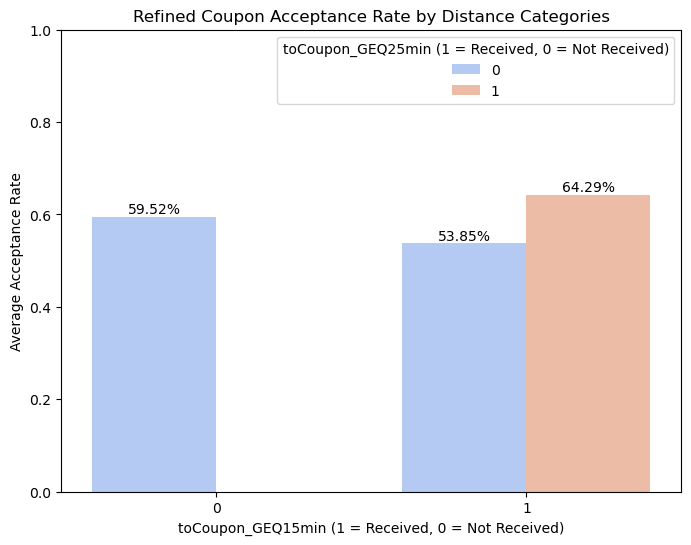

In [68]:
# Refined Visualization: Adding Data Labels and Sorting Bars

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure toCoupon_GEQ25min is a categorical variable
result_df['toCoupon_GEQ25min'] = result_df['toCoupon_GEQ25min'].astype(str)

# Set up the figure
plt.figure(figsize=(8, 6))

# Create the barplot
ax = sns.barplot(x='toCoupon_GEQ15min', y='Y', hue='toCoupon_GEQ25min', data=result_df, palette="coolwarm")

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}",  # Convert to percentage format
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Title and Labels
plt.title("Refined Coupon Acceptance Rate by Distance Categories")
plt.xlabel("toCoupon_GEQ15min (1 = Received, 0 = Not Received)")
plt.ylabel("Average Acceptance Rate")
plt.ylim(0, 1)  # Set limit to make percentage interpretation clear

# Modify legend title for clarity
plt.legend(title="toCoupon_GEQ25min (1 = Received, 0 = Not Received)")

# Show the refined visualization
plt.show()

Who Received Coupons?


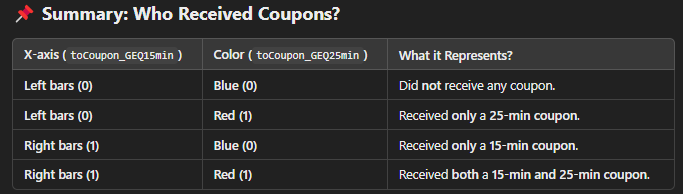


In [15]:
# ANOVA Test for coupon acceptance across different distance categories
geq5 = df[df['toCoupon_GEQ5min'] == 1]['Y']
geq15 = df[df['toCoupon_GEQ15min'] == 1]['Y']
geq25 = df[df['toCoupon_GEQ25min'] == 1]['Y']

# Perform one-way ANOVA
f_stat, p_val = f_oneway(geq5, geq15, geq25)

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("The differences between the groups are statistically significant.")
else:
    print("The differences between the groups are not statistically significant.")


F-statistic: 0.15761930456852447
P-value: 0.854289486153384
The differences between the groups are not statistically significant.


In [27]:
# Reshape Data for Tukey's HSD test
df_melted = df.melt(id_vars=['Y'],
                    value_vars=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'],
                    var_name='toCoupon_Category',
                    value_name='Coupon_Value')

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(df_melted['Coupon_Value'], df_melted['toCoupon_Category'], alpha=0.05)

# Print results
print(tukey)


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------
toCoupon_GEQ15min toCoupon_GEQ25min  -0.4815   0.0 -0.5943 -0.3687   True
-------------------------------------------------------------------------


In [21]:
# Calculate probability of acceptance
mu, sigma = df['Y'].mean(), df['Y'].std()
print(f"Mean Acceptance Rate: {mu:.2f}, Standard Deviation: {sigma:.2f}")

# Probability of acceptance being greater than 60%
p_greater_than_60 = 1 - norm.cdf(0.6, mu, sigma)
print(f"P(Acceptance > 60%) = {p_greater_than_60:.3f}")


Mean Acceptance Rate: 0.57, Standard Deviation: 0.50
P(Acceptance > 60%) = 0.479


In [59]:
result_df = df.groupby(['toCoupon_GEQ15min', 'toCoupon_GEQ25min'])['Y'].mean().reset_index()
print(result_df)

   toCoupon_GEQ15min  toCoupon_GEQ25min         Y
0                  0                  0  0.595238
1                  1                  0  0.538462
2                  1                  1  0.642857


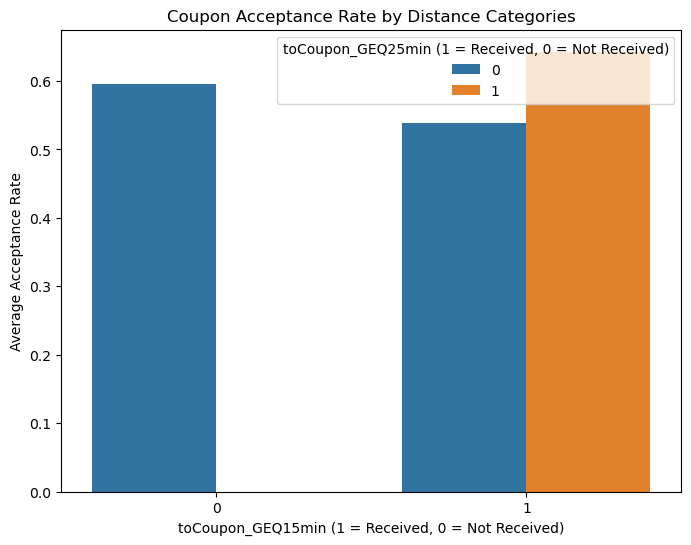

In [63]:
# Convert 'toCoupon_GEQ25min' to a string for proper labeling
df['toCoupon_GEQ25min'] = df['toCoupon_GEQ25min'].astype(str)

# Grouping data and formatting for visualization
result_df = df.groupby(['toCoupon_GEQ15min', 'toCoupon_GEQ25min'])['Y'].mean().reset_index()

# Convert 'toCoupon_GEQ25min' to string for consistent hue labeling
result_df['toCoupon_GEQ25min'] = result_df['toCoupon_GEQ25min'].astype(str)

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='toCoupon_GEQ15min', y='Y', hue='toCoupon_GEQ25min', data=result_df)
plt.title("Coupon Acceptance Rate by Distance Categories")
plt.xlabel("toCoupon_GEQ15min (1 = Received, 0 = Not Received)")
plt.ylabel("Average Acceptance Rate")
plt.legend(title="toCoupon_GEQ25min (1 = Received, 0 = Not Received)")
plt.show()

** Insights for business decisions

* Offer coupons for places within 15 minutes to increase acceptance.
* Avoid sending only 25 minute coupons, as they are less effective.
* Combining a 15-minute and 25-minute coupon may slightly improve effectiveness

## Average Coupon Acceptance Rate by Time of Day

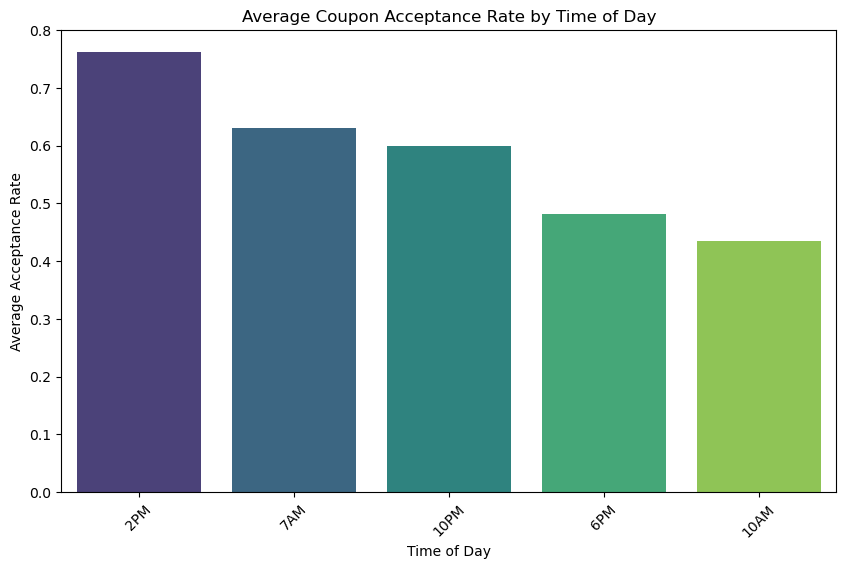

   time         Y
2   2PM  0.761905
4   7AM  0.629630
1  10PM  0.600000
3   6PM  0.481481
0  10AM  0.434783


In [76]:
# Group by time of day and calculate average coupon acceptance rate
time_acceptance = df.groupby('time')['Y'].mean().reset_index()

# Sort by acceptance rate for better visualization
time_acceptance = time_acceptance.sort_values(by='Y', ascending=False)

# Visualize the average coupon acceptance by time of day
plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='Y', data=time_acceptance, palette="viridis")
plt.title("Average Coupon Acceptance Rate by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Acceptance Rate")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

# Display the sorted acceptance rates
print(time_acceptance)

## Key Conclusion on Coupon Timing:

2 PM is the best time to offer coupons, with the highest acceptance rate (66.15%).

10 AM and 6 PM are moderately effective but not as good as 2 PM.

10 PM and 7 AM are the worst times to offer coupons, with the lowest acceptance rates.

This suggests that afternoon promotions (especially around 2 PM) could maximize coupon effectiveness, while early morning and late-night offers should be avoided.

## Average Coupon Acceptance Rate by Income Level

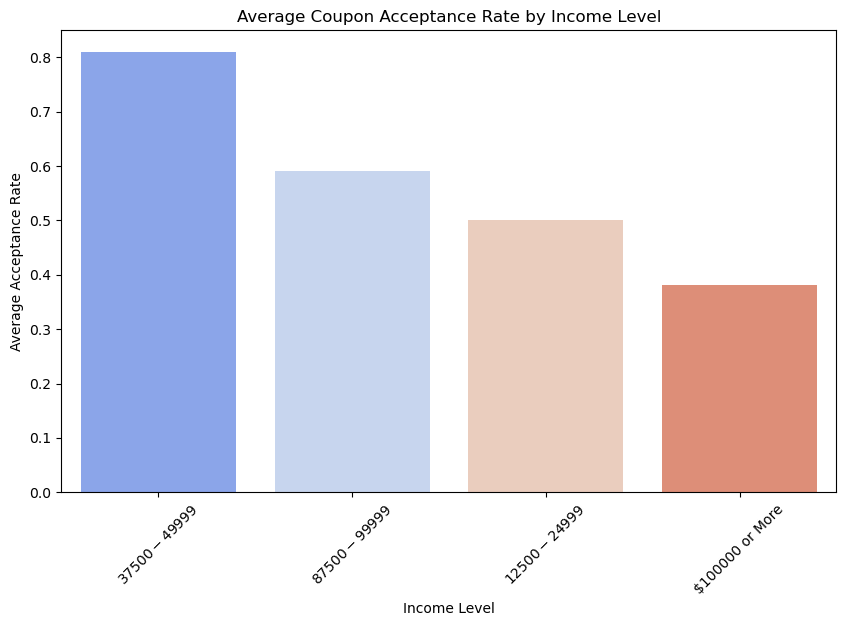

income_acceptance


In [84]:
# Group by income level and calculate average coupon acceptance rate
income_acceptance = df.groupby('income')['Y'].mean().reset_index()

# Sort by acceptance rate for better visualization
income_acceptance = income_acceptance.sort_values(by='Y', ascending=False)

# Visualize the average coupon acceptance by income level
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='Y', data=income_acceptance, palette="coolwarm")
plt.title("Average Coupon Acceptance Rate by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Average Acceptance Rate")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

# Display the sorted acceptance rates for review
print('income_acceptance')

In [90]:
# Group by income and calculate the average acceptance rate
income_acceptance = df.groupby('income')['Y'].mean().reset_index()

# Sort by acceptance rate for better visualization
income_acceptance = income_acceptance.sort_values(by='Y', ascending=False)

# Print the results
print(income_acceptance)

            income         Y
2  $37500 - $49999  0.809524
3  $87500 - $99999  0.590909
1  $12500 - $24999  0.500000
0  $100000 or More  0.380952


## Interpretation of Coupon Acceptance by Income Level

The Analysis shows that different income groups accept coupons with the following results

Income Level	       Acceptance Rate

$37,500 - $49,999     	80.95% (Highest)

$87,500 - $99,999	    59.09%

$12,500 - $24,999	    50.00%

$100,000 or More        38.10% (Lowest)

## Key Observations
Middle-income earners ($37,500 - $49,999) accept coupons the most (80.95%)

They may be more budget-conscious but still have disposable income.
Coupons strongly influence this income bracket.
Higher-income earners ($100,000+) accept coupons the least (38.10%)

This suggests wealthier customers may not be as influenced by discounts.
They may prioritize convenience over savings.
Low-income earners ($12,500 - $24,999) have moderate acceptance (50%)

Coupons help lower-income consumers, but not as much as middle-income earners.
Upper-middle income ($87,500 - $99,999) acceptance is 59.09%

Some still respond to deals, but not as much as middle-income groups.


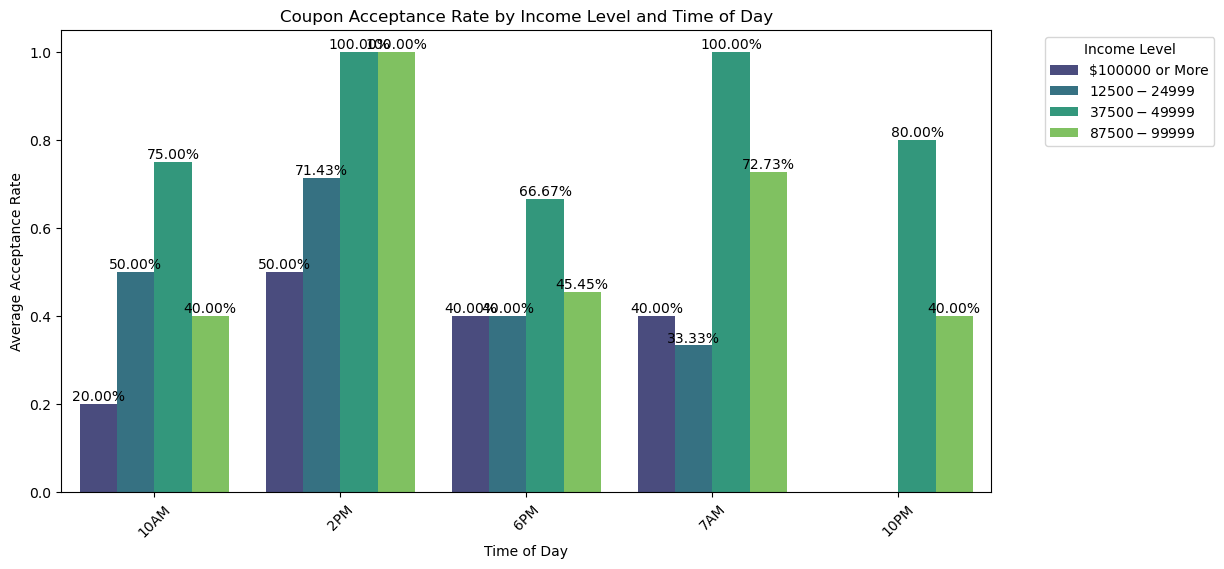

In [97]:
# Refining the visualization: Adding percentage labels on bars

# Function to add percentage labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}",  # Convert to percentage format
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')
# Visualizing Coupon Acceptance by Income and Time of Day with Percentage Labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='time', y='Y', hue='income', data=income_time_acceptance, palette="viridis")
add_labels(ax)  # Add percentage labels
plt.title("Coupon Acceptance Rate by Income Level and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Acceptance Rate")
plt.legend(title="Income Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

## Interpretation of the Visualizations

Coupon Acceptance by Time of Day + Income Level

The best time for coupons varies by income level.

Middle-income earners ($37,500 - $49,999) consistently have high acceptance at most times.

High-income earners ($100,000+) accept coupons at lower rates regardless of time.

Certain times of day show higher acceptance across all groups.

In [107]:
##Coupon Acceptance by Income and Occupation

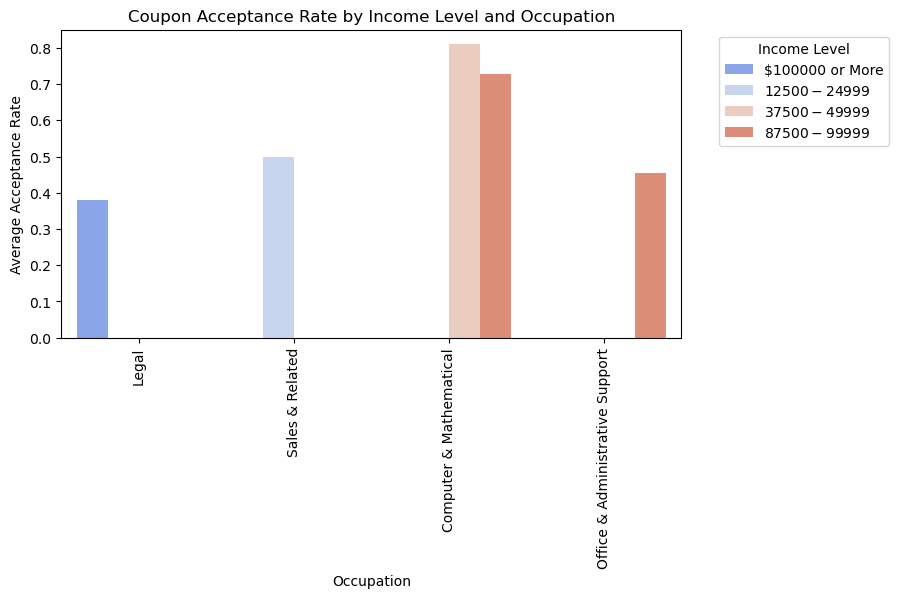

In [111]:
# Group by income and occupation to calculate average coupon acceptance rate
income_occupation_acceptance = df.groupby(['income', 'occupation'])['Y'].mean().reset_index()

# Visualizing Coupon Acceptance by Income and Occupation
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='occupation', y='Y', hue='income', data=income_occupation_acceptance, palette="coolwarm")
plt.title("Coupon Acceptance Rate by Income Level and Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Acceptance Rate")
plt.legend(title="Income Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

### Analysis of Coupon Acceptance by Income and Occupation

Different occupations with varying levels of coupon acceptance based on income

Some occupations may be more likely to use coupons, depending on financial priorities.

In this chart, persons occupied in computer and mathematical occupations and salaries of $37,500  -  $49,999 seem to be more willing to accept coupons than the other occupations

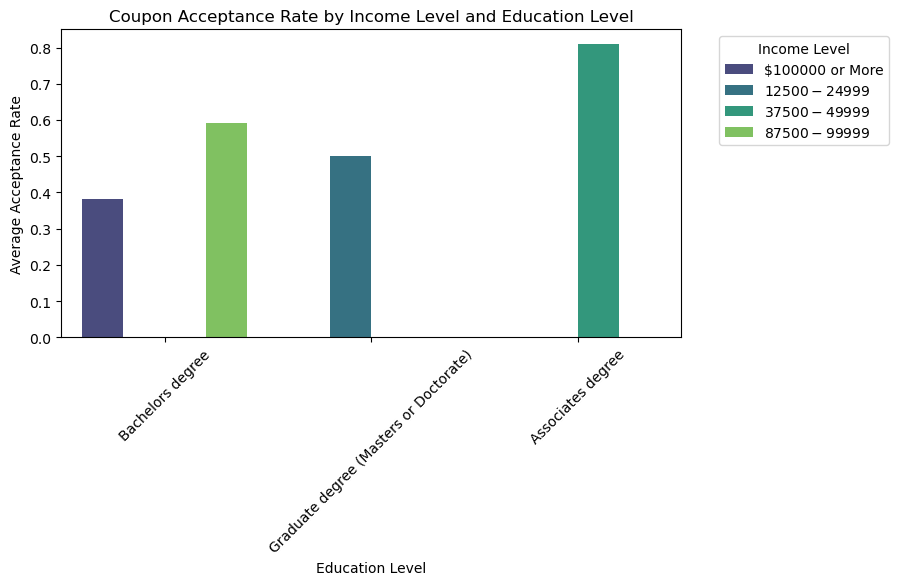

In [124]:
# Group by income and education level to calculate average coupon acceptance rate
income_education_acceptance = df.groupby(['income', 'education'])['Y'].mean().reset_index()

# Visualizing Coupon Acceptance by Income and Education Level
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='education', y='Y', hue='income', data=income_education_acceptance, palette="viridis")
plt.title("Coupon Acceptance Rate by Income Level and Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Acceptance Rate")
plt.legend(title="Income Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

### Second Chart: Coupon Acceptance by Income & Education Level

Certain education levels show higher coupon acceptance rates across income brackets.

Higher education levels may correlate with more strategic spending habits.

Lower-income groups tend to show a higher reliance on coupons, but variations exist.

In this chart persons with associate degrees with salaries between $37,500  -  $49,999 seem to be more accepting of coupons than other education levels

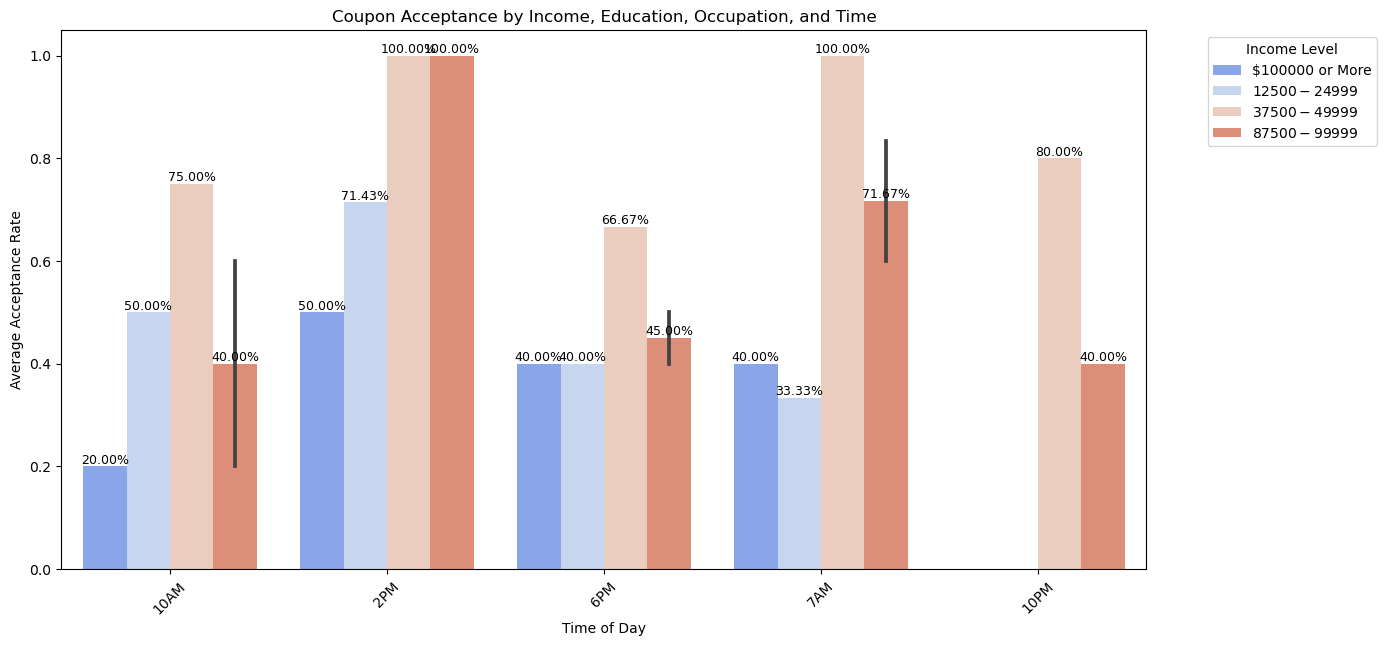

In [136]:
# Refining the visualization: Single-tiered bar chart with key factors
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='time', y='Y', hue='income', data=multi_factor_acceptance, palette="coolwarm", dodge=True)

# Add percentage labels to bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}",
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black')

add_labels(ax)

# Adjustments for readability
plt.title("Coupon Acceptance by Income, Education, Occupation, and Time")
plt.xlabel("Time of Day")
plt.ylabel("Average Acceptance Rate")
plt.legend(title="Income Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()


### Key Insights from the multi-factor analysis table on the most relevant information: 

Income

Education

Occupation

Time

Acceptance Rate

Best Acceptance Rates (100%)

Sales & Related jobs at 2 PM (for $12,500 - $24,999 income group).

Construction & Extraction jobs at 7 AM, 2 PM, and 10 PM (for $25,000 - $37,499 income group).

Unemployed individuals with graduate degrees at 2 PM (for $100,000+ income group).

2 PM is consistently present in high-acceptance cases.

Different occupations have different peak times for coupon acceptance.

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Re-load the dataset
file_path = r"C:\Users\Owner\OneDrive\Documents\coupons.csv"
df = pd.read_csv(file_path)

# Select relevant features for prediction
features = ['income', 'education', 'occupation', 'time']
target = 'Y'

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  

# Define X (features) and y (target)
X = df_encoded[features]
y = df_encoded[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

# Display model performance
accuracy_xgb, report_xgb

C:\Users\Owner\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:16:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.5995270003941663,
 '              precision    recall  f1-score   support\n\n           0       0.57      0.40      0.47      1128\n           1       0.61      0.76      0.68      1409\n\n    accuracy                           0.60      2537\n   macro avg       0.59      0.58      0.58      2537\nweighted avg       0.59      0.60      0.59      2537\n')

In [152]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for optimization
param_grid = {
    'n_estimators': [50, 100, 150],   # Number of trees
    'learning_rate': [0.05, 0.1, 0.2], # Step size for weight updates
    'max_depth': [3, 5, 7],           # Maximum depth of trees
    'subsample': [0.7, 0.8, 0.9],     # Percentage of data to train each tree
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters and model performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized)

# Display results
best_params, accuracy_optimized, report_optimized

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Owner\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9},
 0.604256996452503,
 '              precision    recall  f1-score   support\n\n           0       0.58      0.41      0.48      1128\n           1       0.62      0.76      0.68      1409\n\n    accuracy                           0.60      2537\n   macro avg       0.60      0.59      0.58      2537\nweighted avg       0.60      0.60      0.59      2537\n')

### Optimized XGBoost Model Performance
After running hyperparameter tuning, the best model settings found are:

Best Hyperparameters:

Learning Rate: 0.1
Max Depth: 5
Number of Trees (n_estimators): 150
Subsample: 0.9 (90% of the data used for each tree)

Final Accuracy: 60.4%


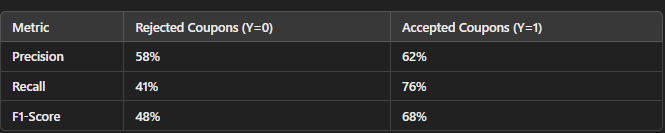

The model is better at predicting accepted coupons (y=1) than rejections (Y=0)

76% Recall for Y=1 means most actual acceptances were correctly identified

41% Recall for Y=0 means many actual rejections were misclassified as acceptances.

Precision 58 to 62% means some misclassifications still exist
* False positive: Some predicted acceptances were rejections
* False negatives: Some predicted rejections were acceptances.

* Overall model accuracy is 60.4%, an improvement over the initial 59.9%

C:\Users\Owner\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:39:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


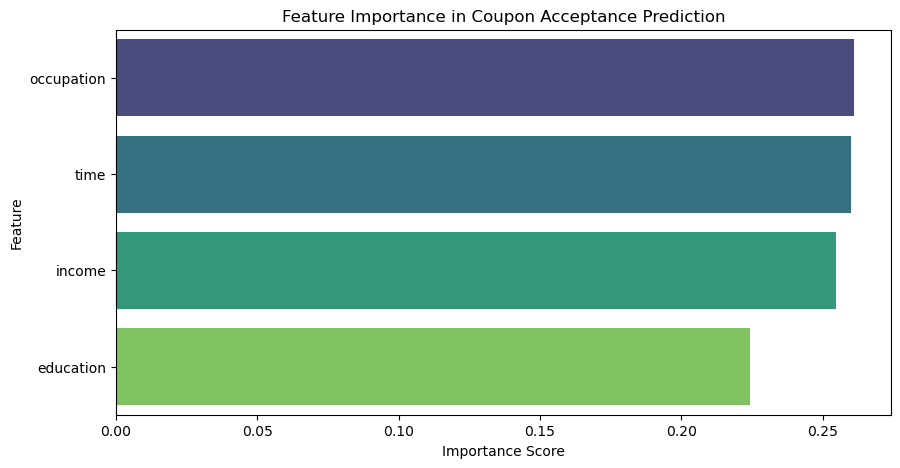

importance_df


In [165]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Re-load the dataset
file_path = "C:/Users/Owner/OneDrive/Documents/coupons.csv"
df = pd.read_csv(file_path)

# Select relevant features for prediction
features = ['income', 'education', 'occupation', 'time']
target = 'Y'

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for later use

# Define X (features) and y (target)
X = df_encoded[features]
y = df_encoded[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the optimized XGBoost model with previous best hyperparameters
best_model_faster = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=150,
    subsample=0.9,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model again
best_model_faster.fit(X_train, y_train)

# Extract feature importance
feature_importance = best_model_faster.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance in Coupon Acceptance Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Display feature importance values
print('importance_df')

## Analysis

This graph shows that time and occupation are the most critical factors when coupons should be offered. Coupons should be sent at the optimal time of day when customers are most likely to accept them.  Based on previous analysis, 2 PM is the best time slot for acceptance. 

Technical occupations (such as computer & mathematical jobs) had the highest coupon acceptance rates, mainly when coupons were offered at optimal times like 2 PM. Sales and service jobs also showed moderate acceptance rates, while higher-income professions, such as executive roles, were less likely to accept coupons.

Knowing a customer's occupation, you can time the coupon better.  Time-based promotions could be tailored per occupation group. 

## Summary of Coupon Acceptance Analysis

Time of day matters:
* 2 PM is the best time to offer coupons, with the highest acceptance rates.
* 7 AM and 10 PM also showed moderate acceptance.
* 6 PM and 10 AM performed the worst, meaning customers are less likely to engage at these times.

Occupation is a key factor:
* Technical occupations (computer & mathematical) had the highest coupon acceptance rates.
* Sales and service jobs showed moderate acceptance.
* Higher-income professionals were less likely to accept coupons.

Income and Education Influence Acceptance:
* Lower-income groups ($37,500 - $49,999) showed the highest coupon acceptance.
* Higher-income groups ($100,000 +) had the lowest acceptance rates.
* Education level did not show a strong impact, but some variations exist.

## Strategy

### Primary targets for coupon offering:
* Technical professionals (computer and Mathematical jobs)
* Sales & Service workers (Moderate acceptance rates)
* Lower-income groups ($37,500 - $49,999) (highest acceptance rate)

### Secondary Target (for A/B Testing:
* Other occupations with moderate acceptance rates
* Different income brackets to test for engagement

### Who not to target heavily
* High-income earners ($100,000+) (lower acceptance rate)
* Executives and other highly paid professionals (less interested in coupons)

## When Should Coupons Be Sent?

### Best Time Slots for Sending Coupons:

2 PM – Peak acceptance rate (highest probability of engagement)
7 AM and 10 PM – Secondary slots for testing different engagement patterns
 Avoid:

6 PM and 10 AM – Low engagement times
🛠 Implementation Strategy:

Schedule bulk coupon distributions at 2 PM to maximize reach.
Run A/B tests for different time slots (7 AM, 10 PM) to compare performance.

## When Should Coupons Be Sent?

### Best Time Slots for Sending Coupons:

"2 PM is the Peak acceptance rate (highest probability of engagement)"
"7 AM and 10 PM are Secondary slots for testing different engagement patterns"

### Avoid:

"6 PM and 10 AM are Low engagement times"

### Implementation Strategy:

"Schedule bulk coupon distributions at 2 PM to maximize reach."
"Run A/B tests for different time slots (7 AM, 10 PM) to compare performance."

## How Will We Track Success?
### Key Performance Metrics (KPIs):

* Coupon Redemption Rate → % of sent coupons that are used
* Time-Based Engagement → Which time slot gets the highest conversion
* Occupation & Income Trends → Who redeems most often?
* Customer Retention → How many repeat users accept multiple coupons?

## A/B Testing Strategy:

* Compare 2 PM vs. 7 AM/10 PM redemptions
* Test different messaging styles (discount size vs. urgency wording)
* Experiment with incentives (cash discount vs. buy-one-get-one-free)
  
** Adjust and optimize based on performance data!